In [3]:
## importing basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_parquet('data/parepared_data.parquet')

In [5]:
data.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour
0,1.0,1.72,186,79,17.7,19.800000,2024,1,1,0
1,1.0,1.80,140,236,10.0,6.600000,2024,1,1,0
2,1.0,4.70,236,79,23.3,17.916667,2024,1,1,0
3,1.0,1.40,79,211,10.0,8.300000,2024,1,1,0
4,1.0,0.80,211,148,7.9,6.100000,2024,1,1,0


In [26]:
data[data['passenger_count']>3]

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour
34,4.0,1.10,236,238,7.9,5.416667,2024,1,1,0
43,4.0,1.04,142,163,7.9,5.683333,2024,1,1,0
44,4.0,2.41,163,140,17.7,16.933333,2024,1,1,0
74,5.0,0.55,239,143,5.1,2.766667,2024,1,1,0
75,5.0,3.10,143,170,26.8,29.366667,2024,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2784632,5.0,1.81,234,170,12.1,10.883333,2024,1,31,23
2784633,5.0,1.44,164,264,12.8,16.000000,2024,1,31,23
2784634,5.0,1.87,161,236,12.8,10.600000,2024,1,31,23
2784684,5.0,4.83,100,151,24.7,20.733333,2024,1,31,23


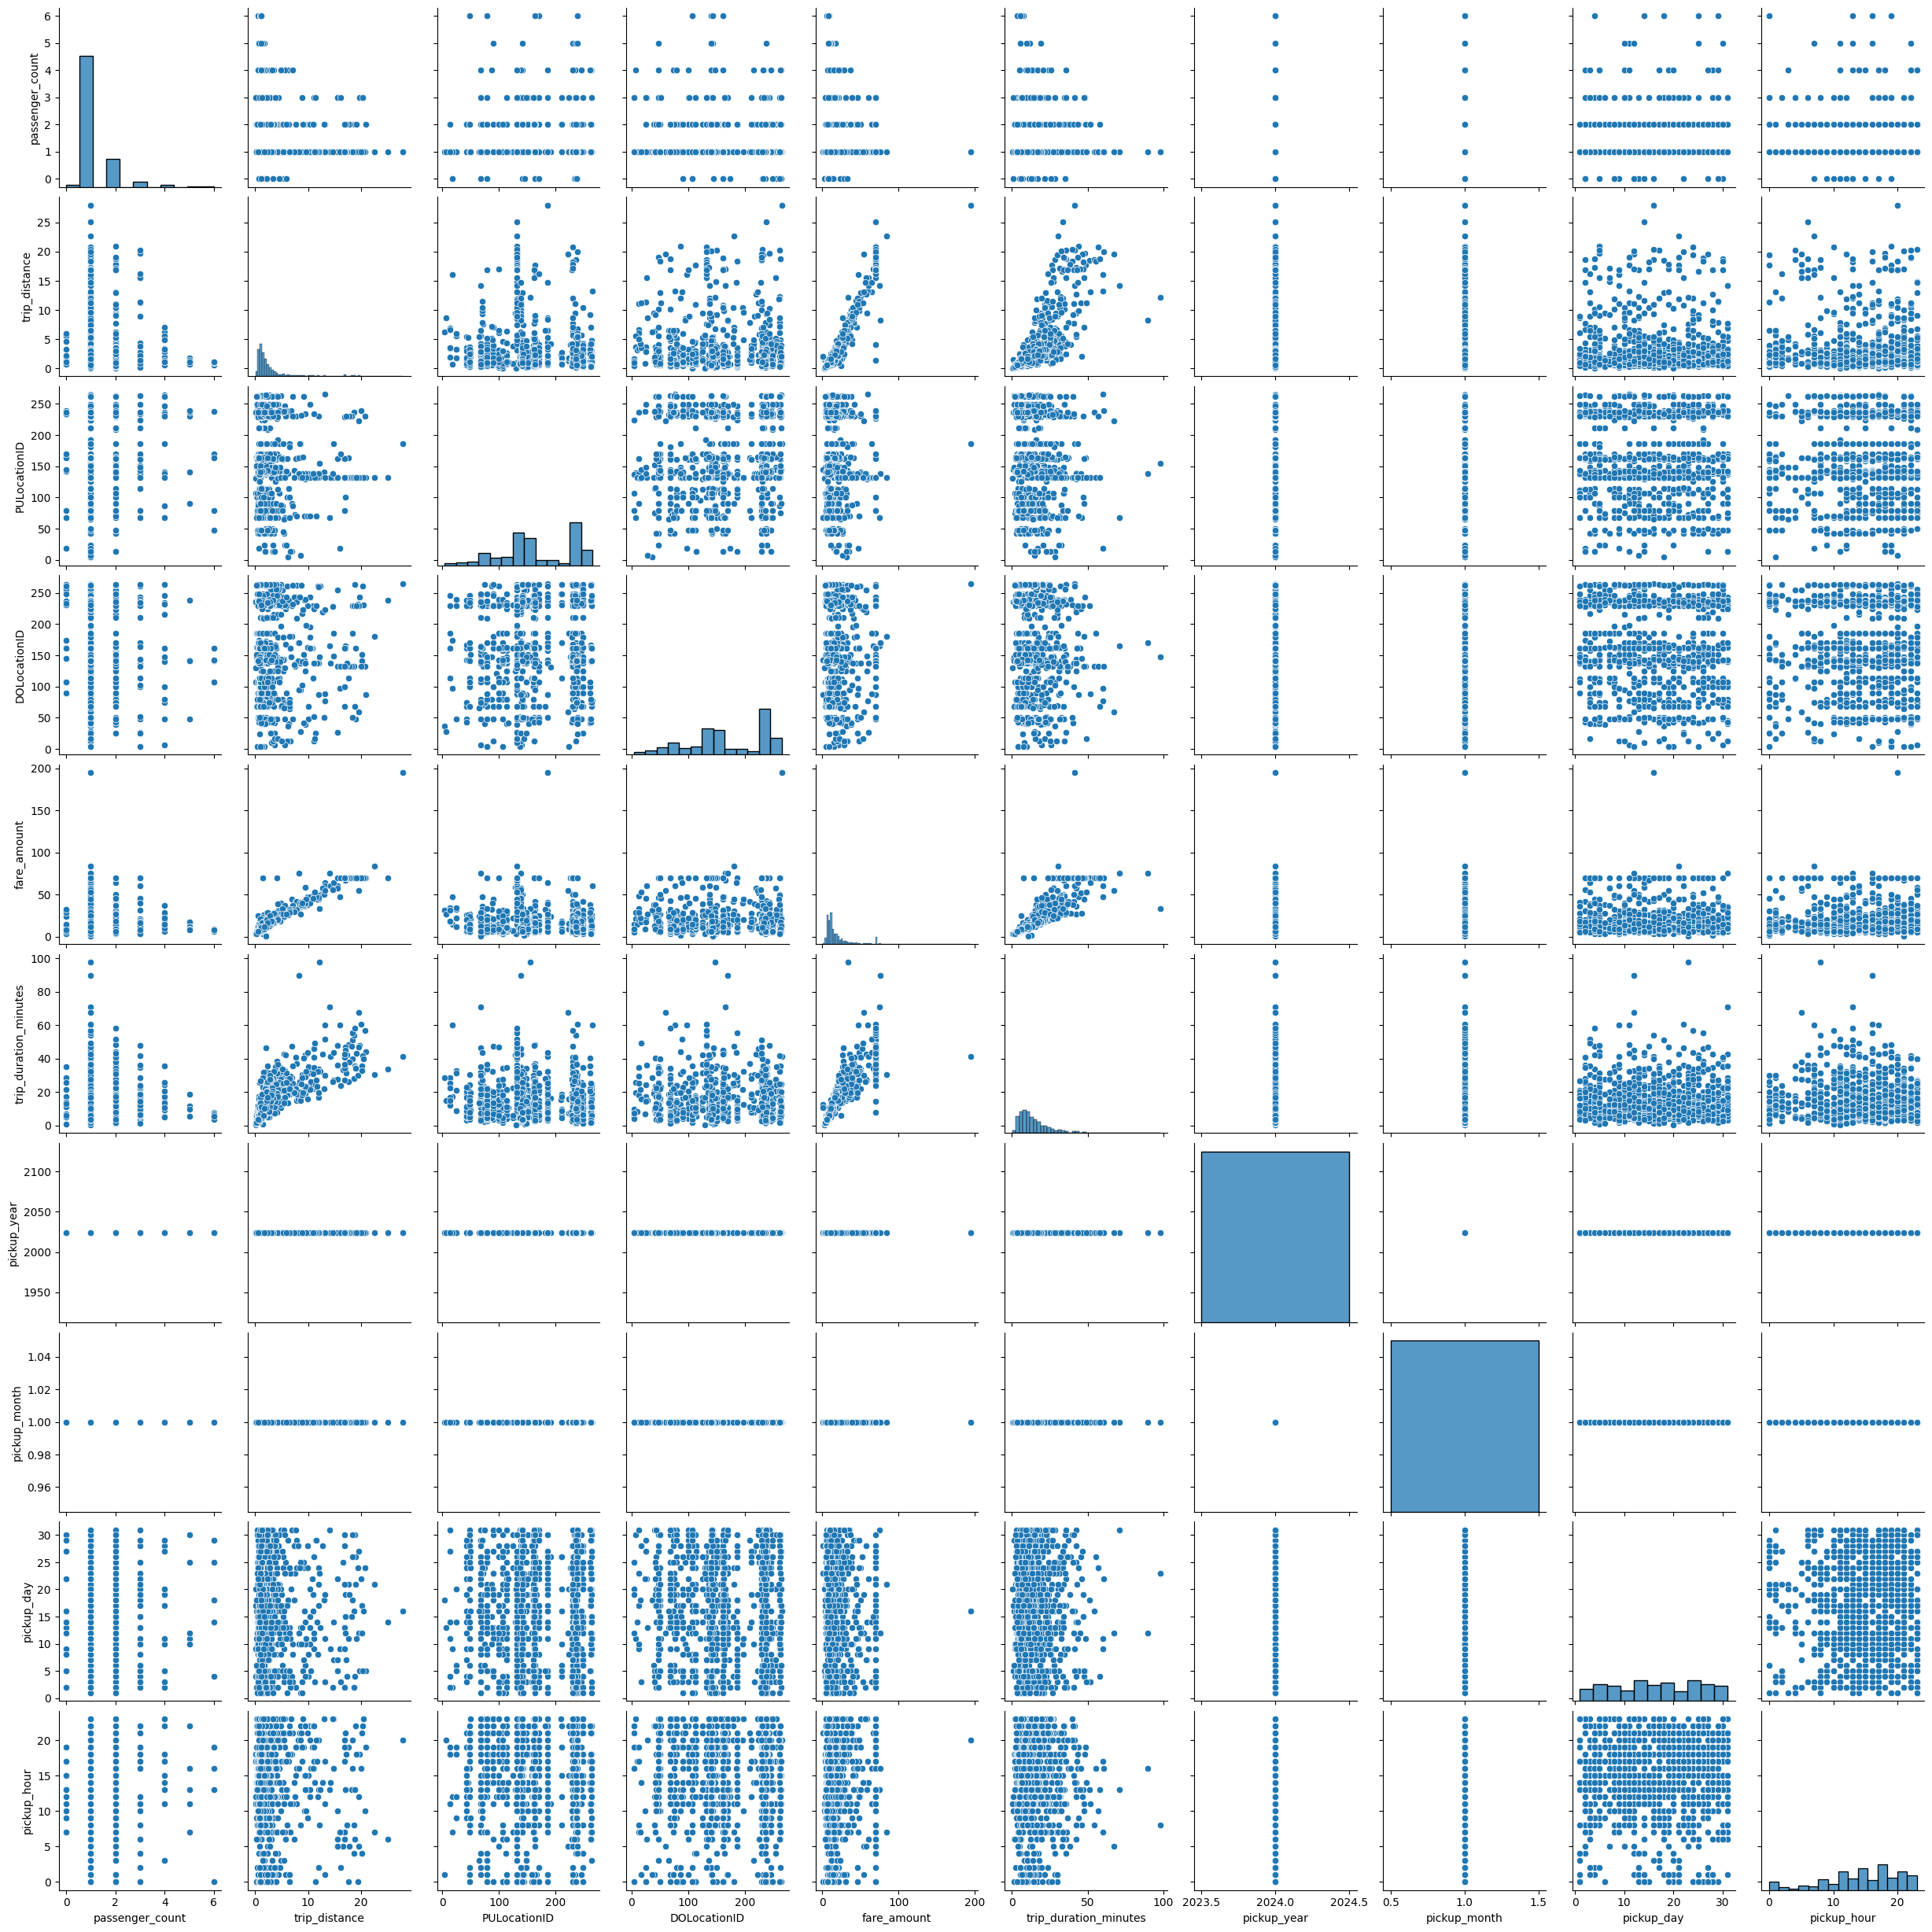

In [7]:
## visulasation of data
sns.pairplot(data.sample(1000,random_state=42))

In [8]:
## corelation b/w feature
data.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour
count,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06,2.902192e+06
mean,1.325518e+00,3.292123e+00,1.661792e+02,1.652470e+02,1.848707e+01,1.493229e+01,2.024000e+03,1.000047e+00,1.644787e+01,1.420678e+01
std,8.352219e-01,4.382395e+00,6.348792e+01,6.927204e+01,1.719309e+01,1.181305e+01,2.386563e-02,2.239069e-02,8.823954e+00,5.698800e+00
min,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,1.666667e-02,2.002000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.010000e+00,1.320000e+02,1.140000e+02,8.600000e+00,7.250000e+00,2.024000e+03,1.000000e+00,9.000000e+00,1.100000e+01
50%,1.000000e+00,1.700000e+00,1.620000e+02,1.620000e+02,1.280000e+01,1.170000e+01,2.024000e+03,1.000000e+00,1.700000e+01,1.500000e+01
75%,1.000000e+00,3.190000e+00,2.340000e+02,2.340000e+02,2.050000e+01,1.871667e+01,2.024000e+03,1.000000e+00,2.400000e+01,1.900000e+01
max,9.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,8.200000e+02,1.790667e+02,2.024000e+03,1.200000e+01,3.100000e+01,2.300000e+01


<Axes: >

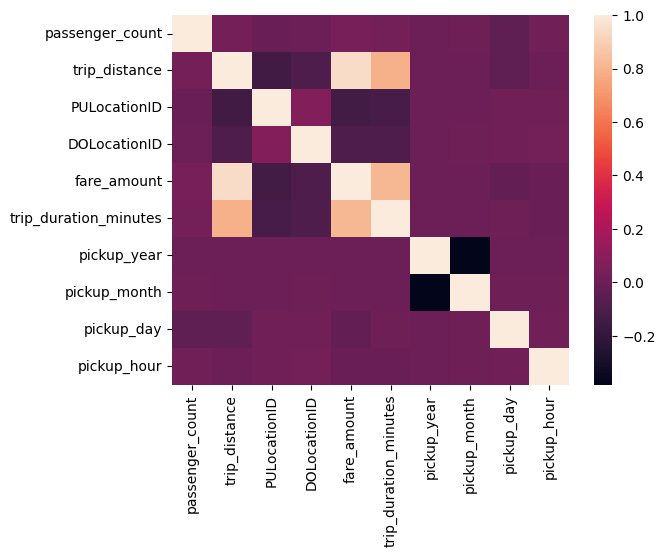

In [9]:
sns.heatmap(data.corr())

In [10]:
## check the multicolinarity
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()  
    
    for i in range(len(corr_matrix.columns)): 
        for j in range(i):  
            if abs(corr_matrix.iloc[i, j]) > threshold:  
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)  

    return col_corr  

In [11]:
correlation(data,0.90)

{'fare_amount'}

In [12]:
## diving the data into dependent and indepdent variable
X = data.drop('fare_amount',axis=1)
y = data['fare_amount']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# Importing important libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import xgboost as xgb


In [16]:
def evaluatemodel(true,predicated):
    mae = mean_absolute_error(true,predicated)
    mse = mean_squared_error(true,predicated)
    rmse = np.sqrt(mean_squared_error(true,predicated))
    r2_square = r2_score(true,predicated)
    return mae,mse,r2_square

In [17]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    # "XGBoost": xgb.XGBRegressor(),   # use the regressor class
    # "GradientBoosting": GradientBoostingRegressor(),  # correct class name
    # "AdaBoost": AdaBoostRegressor(),
}


# Loop through models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation
    train_mae, train_rmse, train_r2 = evaluatemodel(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluatemodel(y_test, y_test_pred)

    # Print results
    print(f"📌 {name}")
    print("Training set:")
    print(f"- RMSE: {train_rmse:.4f}")
    print(f"- MAE: {train_mae:.4f}")
    print(f"- R²: {train_r2:.4f}")

    print("Test set:")
    print(f"- RMSE: {test_rmse:.4f}")
    print(f"- MAE: {test_mae:.4f}")
    print(f"- R²: {test_r2:.4f}")
    print("="*40, "\n")

    

📌 LinearRegression
Training set:
- RMSE: 30.4283
- MAE: 1.8719
- R²: 0.8972
Test set:
- RMSE: 30.1767
- MAE: 1.8645
- R²: 0.8974

📌 DecisionTreeRegressor
Training set:
- RMSE: 0.0022
- MAE: 0.0001
- R²: 1.0000
Test set:
- RMSE: 30.6667
- MAE: 1.3236
- R²: 0.8957

📌 RandomForestRegressor
Training set:
- RMSE: 2.2165
- MAE: 0.3850
- R²: 0.9925
Test set:
- RMSE: 15.8613
- MAE: 1.0228
- R²: 0.9461



In [18]:
rf = RandomForestRegressor()

In [19]:
params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": ["sqrt", 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [20]:
from sklearn.model_selection import RandomizedSearchCV


In [21]:
random_search =RandomizedSearchCV (
    estimator=rf,
    param_distributions=params,
    n_iter=10,            
    cv=2,                 
    verbose=2,
    random_state=42,
    n_jobs=-1             
)

In [22]:
# # Fit on training data
# random_search.fit(X_train, y_train)

# # Best parameters
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

In [23]:
best_rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=15,
    max_features=8,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)

best_rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,15
,min_samples_split,15
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
## save this model 
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(best_rf,f)